In [1]:
import torch
from torch import nn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# 模型容量、欠拟合和过拟合

\begin{definition}\label{def:trainingerror}
训练误差（training error）：模型在训练集上的误差。
\end{definition}


\begin{definition}\label{def:generalizationerror}
泛化误差（generalization error）：模型在新数据上的误差。
\end{definition}


## 统计学习理论

- 之所以能够通过在训练集上训练模型，然后用于检验集，是因为下述假设：
\begin{definition}\label{def:iid}
独立同分布假设（independently identically distributed, i.i.d.）：数据集中的每个样本均彼此独立，且训练集和检验集来自同一个概率分布。
\end{definition}


- 因此，如果训练集和检验集都从同一个概率分布中抽样得到，则对于给定的模型参数，训练的模型在训练集上的**期望训练误差**$=$在检验集上的**期望检验(泛化)误差**

- 但实际顺序：
    1. 采集训练集
    1. 在训练集上训练模型参数，降低训练误差
    1. 采集检验集，评估检验误差

- 因此实际上，检验集误差$\ge$训练误差

- 机器学习算法的优劣取决于：

|两个因素|未达到的后果|
|---|---|
|降低训练误差|欠拟合|
|降低检验误差和训练误差之间的距离|过拟合|

\begin{definition}\label{def:capacity}
模型的容量（capacity）：模型能够拟合各种函数的能力。
\end{definition}


- 模型容量和数据的搭配

<center><img src="../img/4_multilayer-perceptrons/capacityData.png" width=80%></center>

- 存在最优的模型容量

<center><img src="../img/4_multilayer-perceptrons/capacityGeneralization.png" width=80%></center>

- 统计学习理论最重要的结论之一：训练误差和泛化误差距离的上界
    - 随模型容量的增长而增大
    - 随训练样本数量增多而降低

## 影响模型复杂性（即模型泛化能力的因素）

- 1）可调整参数的数量：数量越多，越容易过拟合

- 2) 参数可取值的范围：范围越大，越容易过拟合

- 3）样本数量：样本越少，越容易过拟合

## 没有免费午餐定理

\begin{theorem}\label{theo:nofreelunch}
机器学习的没有免费午餐定理（no free lunch theorem）：在所有可能的数据生成分布上平均之后，每个分类算法在对以前未观察到的样本进行分类时都有相同的错误率。
\end{theorem}



- 即，没有哪种机器学习算法**绝对优于**其他机器学习算法

- 机器学习研究的目标：
    - **不是**寻找绝对好的学习算法
    - **而是**理解哪种概率分布与人工智能体验到的“真实世界”相关，以及哪种算法在所关注的数据分布上的效果最好

# 权重衰减

## 权重衰减基本原理

- 正则化是降低模型过拟合的一种方法，通过限制模型的容量实现

- 权重衰减（weight decay）是最广泛使用的正则化的技术之一
- 通常被称为$L_2$正则化

\begin{definition}\label{def:L2}
$L_2$正则化：将权重向量的范数作为惩罚项加到最小化损失的问题中，将原来的训练目标**最小化训练标签上的预测损失**，调整为**最小化预测损失和惩罚项之和**
\end{definition}


\begin{example}\label{example:linearL2}
线性模型的损失函数如下：

$$L(\boldsymbol{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\boldsymbol{w}^\top \boldsymbol{x}^{(i)} + b - y^{(i)}\right)^2$$

其中，$\boldsymbol{x}^{(i)}$是样本$i$的特征，$y^{(i)}$是样本$i$的标签，$(\boldsymbol{w}, b)$是权重和偏置参
\end{example}


上述线性模型的$L_2$正则化为

$$L(\boldsymbol{w}, b) + \frac{\lambda}{2} \|\boldsymbol{w}\|^2$$

其中，$\lambda\ge0$是**正则化常数**

- L2正则化回归的小批量随机梯度下降更新公式为

$$
\begin{aligned}
\mathbf{w} & \leftarrow \left(1- \eta\lambda \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

其中，$\mathcal{B}$为批量大小

- 不考虑L2正则化的线性模型的最优权重为

$$
\vec{w} = (X^TX)^{-1} X^T\vec{y}
$$

- 考虑L2正则化的线性模型的最优权重改变为

$$
\vec{w} = (X^TX + \alpha I)^{-1}X^T\vec{y}
$$

- L2正则化使得学习算法比较**输入特征的方差**与**输入特征和输出结果的协方差**
    - 当后者$<$前者的时候，该输入特征的权重将会被缩小更多
    - $X^TX$矩阵的对角线上的元素对应每个输入特征的方差

- 考虑两个权重，实线椭圆是不考虑L2正则化时候的损失函数的等高线，虚线圆是L2正则化的等高线
- $w^*$是不考虑L2正则化的最优权重，$\tilde{w}$是考虑L2正则化后的最优权重
- L2正则化会较大缩小$w_1$，较小缩小$w_2$

<center><img src="../img/4_multilayer-perceptrons/reguliarizationL2.png" width=50%></center>

线性模型的$L_1$正则化为

$$L(\boldsymbol{w}, b) + \alpha \|\boldsymbol{w}\|$$

其中，$\alpha\ge0$是**正则化常数**

- 考虑两个权重

<center><img src="../img/4_multilayer-perceptrons/reguliarizationL2.jpg" width=60%></center>

- 考略L1正则化的线性模型的近似最优权重为

$$
w_i = \text{sign}(w_i^*) \max\Big\{ |w_i^*| - \frac{\alpha}{H_{i,i}} , 0\Big\} 
$$

其中，$H$为不考虑L1正则时候的损失函数关于权重的Hessian矩阵，$w_i^*$是不考虑L1正则化时候的最优权重

- L1正则化会产生更加稀疏的解，即一些最优权重会是0

\begin{definition}\label{def:hessian}
Hessian矩阵 $\boldsymbol{H}(f)(\vec{x})$定义如下：

$$
\boldsymbol{H}(f)(\vec{x})_{i,j}=\frac{\partial^2}{\partial x_i\partial x_j}f(\vec{x})
$$
\end{definition}


- 如果$f$在每个点的二阶导数都是连续的，则Hessian矩阵是一个对称矩阵

- $L_2$正则化和$L_1$正则化的比较
    - $L_1$正则化将权重集中在一小部分特征上，而将其他权重清除为零。这称为**特征选择**（feature selection）
    - $L_2$正则化偏向于在大量特征上均匀分布权重
    - $L_2$正则化提供一种连续的机制来调整函数的复杂度

- 偏置是否需要正则化？
    - 在网络的不同层会有所不同
    - 通常网络输出层的偏置**不会被正则化**

\begin{definition}\label{def:regularization}
正则化（regularization）：指修改学习算法,使其降低**泛化误差**而非训练误差。
\end{definition}


\begin{example}\label{example:weightdecay}
用二次函数生成数据点，用9阶多项式拟合，分别用三种正则化常数：$\lambda\to\infty$，中等大小$\lambda$，$\lambda\to0$拟合
\end{example}


<center><img src="../img/4_multilayer-perceptrons/weightdecayexample.png" width=80%></center>

## 高维线性模型的权重衰减

- 生成一些数据
    - 标签含有均值为0，标准差为0.01的噪声
    - 维数为$d = 200$，使用一个只包含20个样本的小训练集，以增加过拟合效果
    
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \varepsilon \text{ where }
\varepsilon \sim \mathcal{N}(0, 0.01^2)$$

In [4]:
import sys
sys.path.append('/home/teaching/slides/deeplearning/3_linear_network')
from linear_regression_concise import synthetic_data,load_array

In [5]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = synthetic_data(true_w, true_b, n_train)  # 生成训练数据
train_iter = load_array(train_data, batch_size)       # 加载训练数据迭代器
test_data = synthetic_data(true_w, true_b, n_test)    # 生成检验数据集
test_iter = load_array(test_data, batch_size, is_train=False)  # 加载检验数据迭代器

### 从零实现实现权重衰减

### 初始化模型参数

In [6]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

### 定义$L_2$范数惩罚

In [7]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

### 定义训练代码实现

In [9]:
from linear_regression_scratch import linreg,squared_loss,sgd
from softmax_regression_scratch import Animator,Accumulator

In [13]:
def train(lambd):
    # 初始化参数
    w, b = init_params()
    # 建立模型与损失函数
    net, loss = lambda X: linreg(X, w, b), squared_loss
    num_epochs, lr = 100, 0.003 # 设置训练的代数和学习率
    # 生成训练动画对象
    animator = Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 对每个批量计算损失，注意包括L2正则
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()   # 反向计算梯度
            # 随机梯度下降算法更新参数
            sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            # 每5代训练可视化一个训练点
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print(f'w的L2范数是：{torch.linalg.matrix_norm(w)}')
#     print(f'权重为{w}')

In [11]:
def evaluate_loss(net, data_iter, loss):
    """评估模型在给定数据集上的损失"""
    metric = Accumulator(2)  # 需要累积两个参数，损失之和, 样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)   # 统一形状，便于y和out计算
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

- ```python
torch.linalg.matrix_norm(A,ord='fro')
```

    - 计算矩阵的范数
    - `ord`决定计算哪个范数，默认`'fro'`是Frobenius范数
    - 该函数替换`torch.norm()`


### 忽略正则化直接训练

w的L2范数是：13.746106147766113


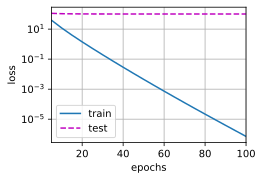

In [14]:
# lambd=0禁用权重衰减
train(lambd=0)

\begin{problem}\label{prob:lambd0}
训练损失和检验损失有什么特点？
\end{problem}

- 训练损失小，但检验损失很大

### 使用权重衰减

w的L2范数是：0.34716400504112244


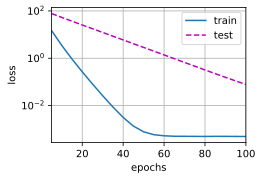

In [15]:
train(lambd=3)

\begin{problem}\label{prob:lambd1}
训练损失和检验损失有什么特点？
\end{problem}

- 训练损失没有$\lambda=0$时小，但检验损失也降低了

- 总结
    - 当训练样本数较少时，正则化的效果更加明显
    - 当特征减少时，仍然需要正则化

## 简洁实现

In [16]:
def train_concise(wd):
    # 建立模型
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    # 初始化参数
    for param in net.parameters():
        param.data.normal_()
    # 建立损失函数
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)  # torch.optim.SGD(params,lr), params is a list of dicts
    # 建立动画显示训练过程对象
    animator = Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (evaluate_loss(net, train_iter, loss),
                          evaluate_loss(net, test_iter, loss)))
    print(f'w的L2范数：{net[0].weight.norm()}')

### 不考虑权重衰减

w的L2范数：13.664374351501465


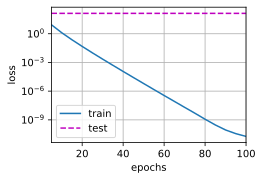

In [17]:
train_concise(0)

### 考虑权重衰减

w的L2范数：0.4264031946659088


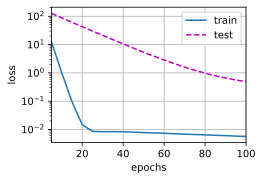

In [18]:
train_concise(3)